In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text, inspect
import datetime as dt


In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)


# reflect the tables


In [6]:
# View all of the classes that automap found
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
#Get column names for each table in database and print column name and data type
inspector.get_columns("measurement")
columns = inspector.get_columns("measurement")
for column in columns:
        print(column["name"],column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
#Get column names for each table in database and print column name and data type
columns = inspector.get_columns("station")
for column in columns:
        print(column["name"],column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
#show contents of each database table for reference
engine.execute(text('SELECT * FROM measurement LIMIT 5')).fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [10]:
#show contents of each database table for reference
engine.execute(text('SELECT * FROM station')).fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [11]:
# Save references to each table
measurement = Base.classes.measurement  #put each table into a python class
station = Base.classes.station      #put each table into a python class

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first() #order dates by descending order and return 1st in list (most recent)
#yr_ago = dt.date(recent_date) #- dt.timedelta(day=1)  #need to make them same data type to add/subtract
print(recent_date)
#yr_ago

('2017-08-23',)


Text(0, 0.5, 'Inches')

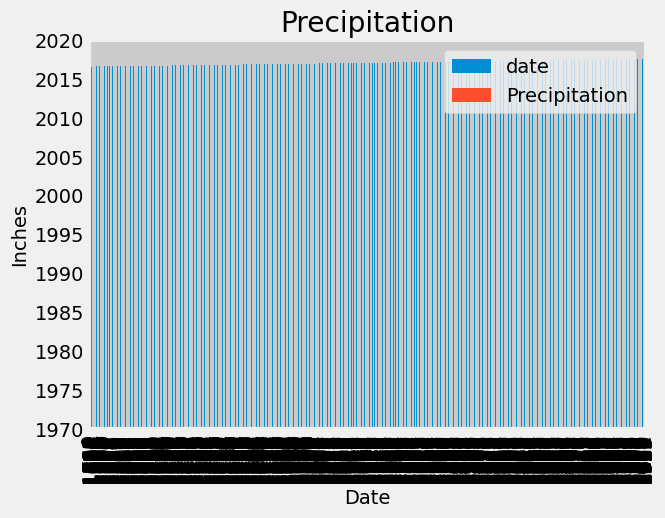

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
yr_ago = dt.date(2016,8,23)
yr_ago_data = session.query(measurement.date,measurement.prcp).filter(measurement.date > yr_ago) #query the database and filter for dates in the last year
df = pd.DataFrame(yr_ago_data) #put into dataframe
df = df.dropna() #drop null rows
df["date"] = pd.to_datetime(df["date"])

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = df.rename(columns=({"prcp": "Precipitation"})) #rename column


# Sort the dataframe by date
df = df.sort_values("date", ascending = True)

# Use Pandas Plotting with Matplotlib to plot the data
ax = df.plot(kind="bar",title="Precipitation")
ax.set_xlabel("Date")
ax.set_ylabel("Inches")
#df.plot.hist(x=df["date"],y=df["Precipitation"])
#plt.show()

[datetime.datetime(2016, 11, 23, 0, 0), datetime.datetime(2016, 11, 28, 0, 0), datetime.datetime(2016, 12, 3, 0, 0), datetime.datetime(2016, 12, 8, 0, 0), datetime.datetime(2016, 12, 13, 0, 0), datetime.datetime(2016, 12, 18, 0, 0), datetime.datetime(2016, 12, 23, 0, 0), datetime.datetime(2016, 12, 28, 0, 0), datetime.datetime(2017, 1, 2, 0, 0), datetime.datetime(2017, 1, 7, 0, 0), datetime.datetime(2017, 1, 12, 0, 0), datetime.datetime(2017, 1, 17, 0, 0), datetime.datetime(2017, 1, 22, 0, 0), datetime.datetime(2017, 1, 27, 0, 0), datetime.datetime(2017, 2, 1, 0, 0), datetime.datetime(2017, 2, 6, 0, 0), datetime.datetime(2017, 2, 11, 0, 0), datetime.datetime(2017, 2, 16, 0, 0), datetime.datetime(2017, 2, 21, 0, 0), datetime.datetime(2017, 2, 26, 0, 0), datetime.datetime(2017, 3, 3, 0, 0), datetime.datetime(2017, 3, 8, 0, 0), datetime.datetime(2017, 3, 13, 0, 0), datetime.datetime(2017, 3, 18, 0, 0), datetime.datetime(2017, 3, 23, 0, 0), datetime.datetime(2017, 3, 28, 0, 0), datetime.da

C:\Users\Mark McLaughlin\AppData\Local\Temp\ipykernel_9736\1005736223.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_groupbybins = df.groupby(df["date_bins"]).mean()


Text(0, 0.5, 'Inches')

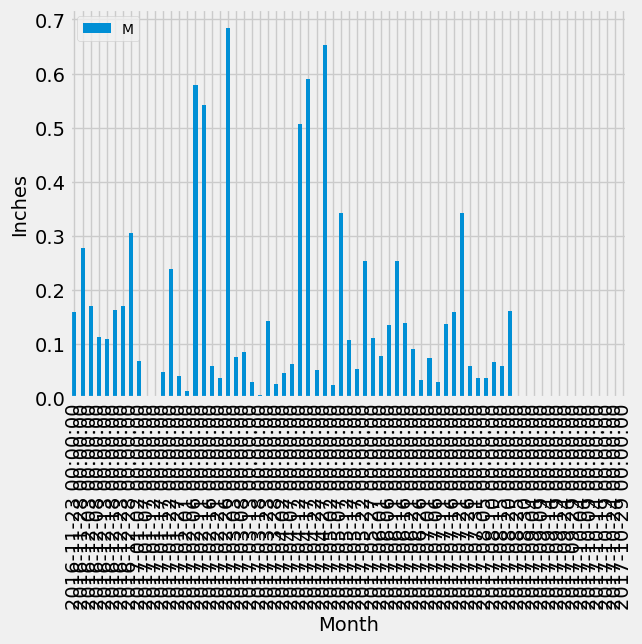

In [15]:
#groupby bins to plot. I don't want to tak ethe time to make arrary
#groupby bins to plot. 
date_bins = []
label = []
for i in range(70):  #group in 5 day incremints or 365/5
    datething = dt.datetime(2016,11,23) + dt.timedelta(days=5*i)
    newlabel = f'{dt.datetime(2016,11,23) + dt.timedelta(days=5*i)}'
    label.append(newlabel)
    date_bins.append(datething)
print(date_bins)
del label[-1] #delete last item in list so there is 1 less label than there are bins
print(label)

#date_bins = [dt.datetime(2016,8,23), dt.datetime(2016,9,23), dt.datetime(2016,10,23), 
#             dt.datetime(2016,11,23), dt.datetime(2016,12,23),
#             dt.datetime(2017,1,23), dt.datetime(2017,2,23), dt.datetime(2017,3,23), 
#             dt.datetime(2017,4,23), dt.datetime(2017,5,23), dt.datetime(2017,6,23), 
#             dt.datetime(2017,7,23), dt.datetime(2017,8,23)]
#label = ["AUG","SEPT","OCT","NOV","DEC","JAN","FEB","MAR","APR","MAY","JUN","JUL"]
df["date_bins"] = pd.cut(df["date"],date_bins,labels=label,include_lowest=True)
df_groupbybins = df.groupby(df["date_bins"]).mean()
df_groupbybins

#plot by month
ax = df_groupbybins.plot(kind="bar",legend = True)
ax.legend("Mean_precipitation",loc='upper left',prop={'size':10}) #only shows 1 letter of legend for some reason
ax.set_xlabel("Month")
ax.set_ylabel("Inches")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2015 entries, 0 to 2222
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           2015 non-null   datetime64[ns]
 1   Precipitation  2015 non-null   float64       
 2   date_bins      1490 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 51.8 KB


In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [18]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [19]:
# Design a query to calculate the total number of stations in the dataset


# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(measurement.station).distinct().count() #query the database and filter for dates in the last year
station_count

9

In [21]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station = pd.DataFrame(session.query(measurement.station,measurement.tobs,measurement.date)) #query the database and filter for dates in the last year
station["station"].value_counts().sort_values(ascending=False)

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [22]:
station

,station,tobs,date
0,USC00519397,65.0,2010-01-01
1,USC00519397,63.0,2010-01-02
2,USC00519397,74.0,2010-01-03
3,USC00519397,76.0,2010-01-04
4,USC00519397,73.0,2010-01-06
...,...,...,...
19545,USC00516128,71.0,2017-08-19
19546,USC00516128,78.0,2017-08-20
19547,USC00516128,76.0,2017-08-21
19548,USC00516128,76.0,2017-08-22


In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
stationloc = station.loc[station["station"] == "USC00519281"]
stationloc.describe()

,tobs
count,2772.000000
mean,71.663781
std,4.357642
min,54.000000
25%,69.000000
50%,72.000000
75%,74.000000
max,85.000000


In [24]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
stationloc2 = stationloc.loc[station["date"] > "2016-8-23"].sort_values("date", ascending=False)
stationloc2 #this station was only used in 2017


,station,tobs,date
14958,USC00519281,79.0,2017-08-18
14957,USC00519281,76.0,2017-08-17
14956,USC00519281,76.0,2017-08-16
14955,USC00519281,77.0,2017-08-15
14954,USC00519281,77.0,2017-08-14
...,...,...,...
14742,USC00519281,63.0,2017-01-05
14741,USC00519281,63.0,2017-01-04
14740,USC00519281,64.0,2017-01-03
14739,USC00519281,70.0,2017-01-02


In [26]:
#groupby bins to plot. 
temp_bins = []
label = []
for i in range(26):
    temp = 60 + i
    newlabel = f'{60+i}'
    label.append(newlabel)
    temp_bins.append(temp)
print(temp_bins)
del label[-1] #delete last item in list so there is 1 less label than there are bins
print(label)

#temp_bins = [60,65,70,75,80,85]
#label = ["60-65","65-70","70-75","75-80","80-85"]
stationloc2["temp_bins"] = pd.cut(stationloc2["tobs"],temp_bins,labels=label,include_lowest=True)
df_groupbybins2 = stationloc2.groupby(stationloc2["temp_bins"]).count()
df_groupbybins2



[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85]
['60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84']


,station,tobs,date
temp_bins,,,
60,3,3,3
61,5,5,5
62,3,3,3
63,3,3,3
64,6,6,6
65,4,4,4
66,11,11,11
67,9,9,9
68,14,14,14


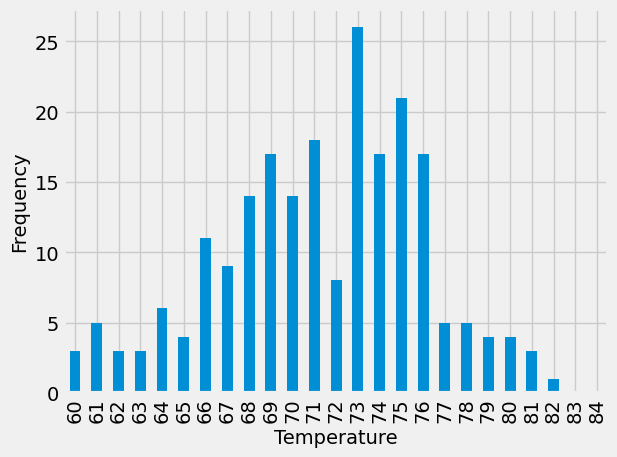

In [27]:
#plot by month
ax = df_groupbybins2["tobs"].plot(kind="bar", legend = False)
ax.set_xlabel("Temperature")
ax.set_ylabel("Frequency")
plt.tight_layout()
#stationloc2.hist(x="tobs")


# Close Session

In [28]:
# Close Session
session.close()